 If I understand it correctly, the algorithm is tuned by the lower bounds on the hazard rates L_i (via the selection of \nu_i) and I assume that in practice L_i-s are typically unknown. This should be stated very clearly in the paper. And, perhaps, some sensitivity tests to misspecification of L_i-s should be done.

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pickle
from prettytable import PrettyTable

from codes.UCB_discrete import M_UCB, UCB1, UCB_V, MV_LCB, Exp3
from codes.Environment import AbsGau, Exp, AbsGau_Outlier, Exp_Outlier, setup_env
from codes.SimulatedGames import simulate
from codes.plots import plot_hist, plot_eva

%matplotlib inline

In [2]:
# setting

num_exper = 100
num_rounds = 1000
num_arms = 3

# environment


environments = [
    {AbsGau: [0.5, 0.1], Exp: [1]},
    {AbsGau_Outlier: [0.5, 0.1], Exp_Outlier: [1]},
]
paras = [50] # [rho for MV]
rewards_env, medians, means, mvs, samples = setup_env(num_arms, environments, paras)

In [3]:
arm_name_dict = {
    0: 'A',
    1: 'B',
    2: 'C'
}

for key in medians.keys():
    print(key)
    medians[key] = list(np.around(np.array(medians[key]),2))
    means[key] = list(np.around(np.array(means[key]),2))
    mvs[key] = list(np.around(np.array(mvs[key]),2))
    t = PrettyTable(['Eva', 'A', 'B', 'C', 'Best Arm'])
    t.add_row(['Median'] + medians[key]+ [arm_name_dict[np.argmax(medians[key])]])
    t.add_row(['Mean']+ means[key]+ [arm_name_dict[np.argmax(means[key])]])
    t.add_row(['MV']+ mvs[key]+ [arm_name_dict[np.argmin(mvs[key])]])
    print(t)
    print()

AbsGau_[0.5, 0.1]Exp_[1]
+--------+--------+-------+--------+----------+
|  Eva   |   A    |   B   |   C    | Best Arm |
+--------+--------+-------+--------+----------+
| Median |  0.34  |  0.07 |  0.71  |    C     |
|  Mean  |  0.39  |  0.08 |  1.0   |    C     |
|   MV   | -19.65 | -3.99 | -49.08 |    C     |
+--------+--------+-------+--------+----------+

AbsGau_Outlier_[0.5, 0.1]Exp_Outlier_[1]
+--------+--------+--------+-------+----------+
|  Eva   |   A    |   B    |   C   | Best Arm |
+--------+--------+--------+-------+----------+
| Median |  0.36  |  0.07  |  0.74 |    C     |
|  Mean  |  1.4   |  1.07  |  1.98 |    C     |
|   MV   | -51.33 | -34.65 | -80.2 |    C     |
+--------+--------+--------+-------+----------+



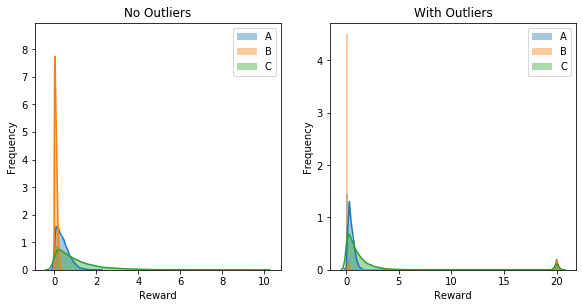

In [4]:
plot_hist(samples)

In [5]:
# run experiments

def run_exper(rewards_env, hyperpara_list, num_exper, num_rounds, policy, summary_stats, est_flags = [True]):
    for key in rewards_env.keys():
        for hyperpara in hyperpara_list:
            for est_flag in est_flags:
                name = key + '_' + str(num_exper) + '_' + str(num_rounds)
                policy_name = str(policy).split('.')[-1].split('\'')[0] + '-'
                subname = policy_name + str(hyperpara)
                print(name + subname)
                p = IntProgress(max = num_exper)
                p.description = 'Running'
                display(p)
                results[name][subname] = simulate(rewards_env[key],summary_stats[key], policy, num_exper, num_rounds, est_flag, hyperpara, None, p)
            

In [6]:
results = defaultdict(dict)

# for misspecification test

fixed_Ls = [[0.8, 1, 0.6], [0.6, 0.8, 1], [0.8, 4, 0.5], [0.5, 0.8, 4]]

# M-UCB

hyperpara_list = [[0.5, 0.2, 1]]
for i, key in enumerate(rewards_env.keys()):
    for hyperpara in hyperpara_list:
        for est_flag in [True, False]: 
            name = key + '_' + str(num_exper) + '_' + str(num_rounds)
            if est_flag == True:
                for fixed_L in fixed_Ls:
                    subname = str(fixed_L)
                    print(name + subname)
                    p = IntProgress(max = num_exper)
                    p.description = 'Running'
                    display(p)
                    results[name][subname] = simulate(rewards_env[key],medians[key], M_UCB, num_exper, num_rounds, est_flag, hyperpara, fixed_L, p)
            else:
                fixed_L = None
                subname = 'True L_i'
                p = IntProgress(max = num_exper)
                p.description = 'Running'
                display(p)
                results[name][subname] = simulate(rewards_env[key],medians[key], M_UCB, num_exper, num_rounds, est_flag, hyperpara, fixed_L, p)
            

AbsGau_[0.5, 0.1]Exp_[1]_100_1000[0.8, 1, 0.6]


IntProgress(value=0, description='Running')

AbsGau_[0.5, 0.1]Exp_[1]_100_1000[0.6, 0.8, 1]


IntProgress(value=0, description='Running')

AbsGau_[0.5, 0.1]Exp_[1]_100_1000[0.8, 4, 0.5]


IntProgress(value=0, description='Running')

AbsGau_[0.5, 0.1]Exp_[1]_100_1000[0.5, 0.8, 4]


IntProgress(value=0, description='Running')

IntProgress(value=0, description='Running')

AbsGau_Outlier_[0.5, 0.1]Exp_Outlier_[1]_100_1000[0.8, 1, 0.6]


IntProgress(value=0, description='Running')

AbsGau_Outlier_[0.5, 0.1]Exp_Outlier_[1]_100_1000[0.6, 0.8, 1]


IntProgress(value=0, description='Running')

AbsGau_Outlier_[0.5, 0.1]Exp_Outlier_[1]_100_1000[0.8, 4, 0.5]


IntProgress(value=0, description='Running')

AbsGau_Outlier_[0.5, 0.1]Exp_Outlier_[1]_100_1000[0.5, 0.8, 4]


IntProgress(value=0, description='Running')

IntProgress(value=0, description='Running')

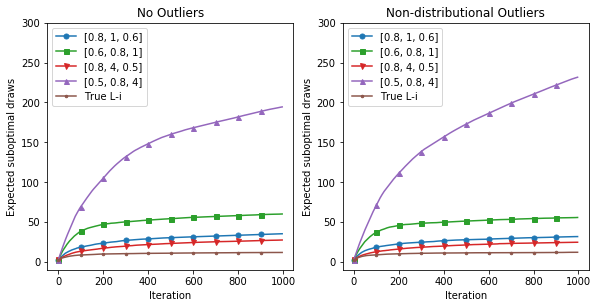

In [7]:
plot_eva(results, 'sd')

In [8]:
import pickle

with open('sensi_L.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)